### Logistic Regression

In [34]:
# import the needed libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix,precision_score,recall_score
from sklearn.datasets import load_breast_cancer

In [17]:
# load the dataset
X = load_breast_cancer(as_frame=True)['data']
y = load_breast_cancer()['target']

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
# scale the dataset
columns = list(X.columns)
scaler = StandardScaler() # init the scaler
X = scaler.fit_transform(X) # transform the data
X = pd.DataFrame(data = X, columns=columns)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### MODEL TRAINING

In [19]:
# split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23,
                                                    test_size=0.2, stratify=y)

for dataset in [X_train, X_test, y_train, y_test ]:
    print(dataset.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [20]:
# train the model

# init the algorithm
model = LogisticRegression()
model.fit(X_train, y_train) # fit the model to the data
test_preds = model.predict(X_test) # get predictions
test_preds[:5]

array([0, 1, 0, 1, 1])

### EVALUATE THE MODEL

In [21]:
# get accuracy score
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=test_preds)}')

Accuracy: 0.9824561403508771


### A demo of why accuracy is not a good metrics

In [26]:
def predict_cancer():
    predictions = []
    while True:
        name = input('Enter your name to find out if you have cancer: ')
        if name != 'stop':
            print(f'Hi {name} you dont have cancer')
            predictions.append(0)
        else:
            break
    return predictions
    

In [27]:
tomi_test = predict_cancer()

Hi xyz you dont have cancer
Hi abc you dont have cancer
Hi dnjd you dont have cancer
Hi cj d you dont have cancer
Hi djd you dont have cancer


In [32]:
ola_test = [0,0,0,0,0,0,1,1,1,1]
tomi_test = [0,0,0,0,0,0,0,0,0,0]

In [28]:
tomi_test

[0, 0, 0, 0, 0]

#### Some Advanced classification Metrics

Text(33.222222222222214, 0.5, 'Predicted class')

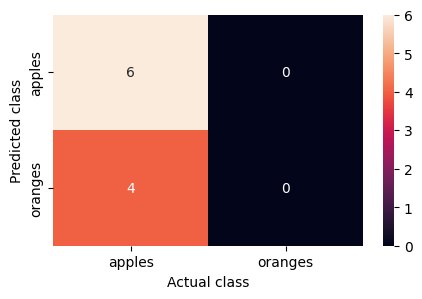

In [ ]:
# some apple and oranges explanation of precision and recall

fruits = ['apples', 'oranges']
conf_data = confusion_matrix(ola_test, tomi_test)
conf_data = pd.DataFrame(data = conf_data, index=fruits, columns=fruits)
plt.figure(figsize=(5,3))
sns.heatmap(conf_data, annot=True)
plt.xlabel('Actual class')
plt.ylabel('Predicted class')

Text(33.222222222222214, 0.5, 'Predicted class')

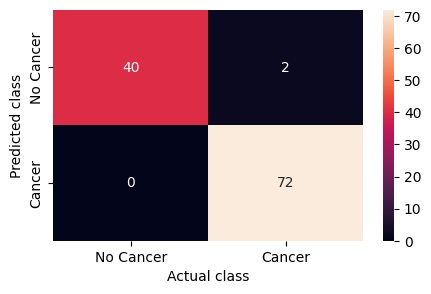

In [41]:
case = ['No Cancer', 'Cancer']
conf_data = confusion_matrix(y_test, test_preds)
conf_data = pd.DataFrame(data = conf_data, index=case, columns=case)
plt.figure(figsize=(5,3))
sns.heatmap(conf_data, annot=True)
plt.xlabel('Actual class')
plt.ylabel('Predicted class')

In [47]:
precision_score(y_test, test_preds)

0.972972972972973

In [45]:
recall_score(y_test, test_preds)

1.0

In [48]:
f1_score(y_test, test_preds)

0.9863013698630136

In [49]:
f1_score(ola_test,tomi_test)

0.0

### Assigment

Write a a short medium article on Logistic regression with focus on:
1. model architecture and the need for scaling our dataset
2. model Evaluation and the reason why accuracy is not a good metrics
3. similarities between linear and logistic regression

### LOGISTIC REGRESSION (OCTOBER COHORT)

In [32]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score,classification_report

In [3]:
data = pd.read_csv(r'C:\Users\hp\Desktop\machine-learning-notes\data\heart_disease.csv')
data.head(5)

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195.0,0,0,122,0,0.0,1,0


In [4]:
# remove unnamed column

data.drop(columns = ['Unnamed: 0'], inplace= True)

In [5]:
indep_cols = list(data.drop(columns=['target']).columns)

for col in range(len(indep_cols)):
    corr_value = data[[indep_cols[col],'target']].corr(method='spearman').iloc[1][indep_cols[col]]
    print(f'target vs {indep_cols[col]} : {corr_value}')
    print('============================')


target vs age : 0.15367868709274035
target vs sex : 0.11213132858141045
target vs chest pain type : 0.3795031434467727
target vs resting bps : 0.08565216540092231
target vs cholesterol : 0.052924853399883294
target vs fasting blood sugar : 0.10689734152926006
target vs resting ecg : 0.12655844759599844
target vs max heart rate : -0.14608846994468555
target vs exercise angina : 0.27092005175285694
target vs oldpeak : 0.2481754297518024
target vs ST slope : 0.5424316735437534


<Axes: >

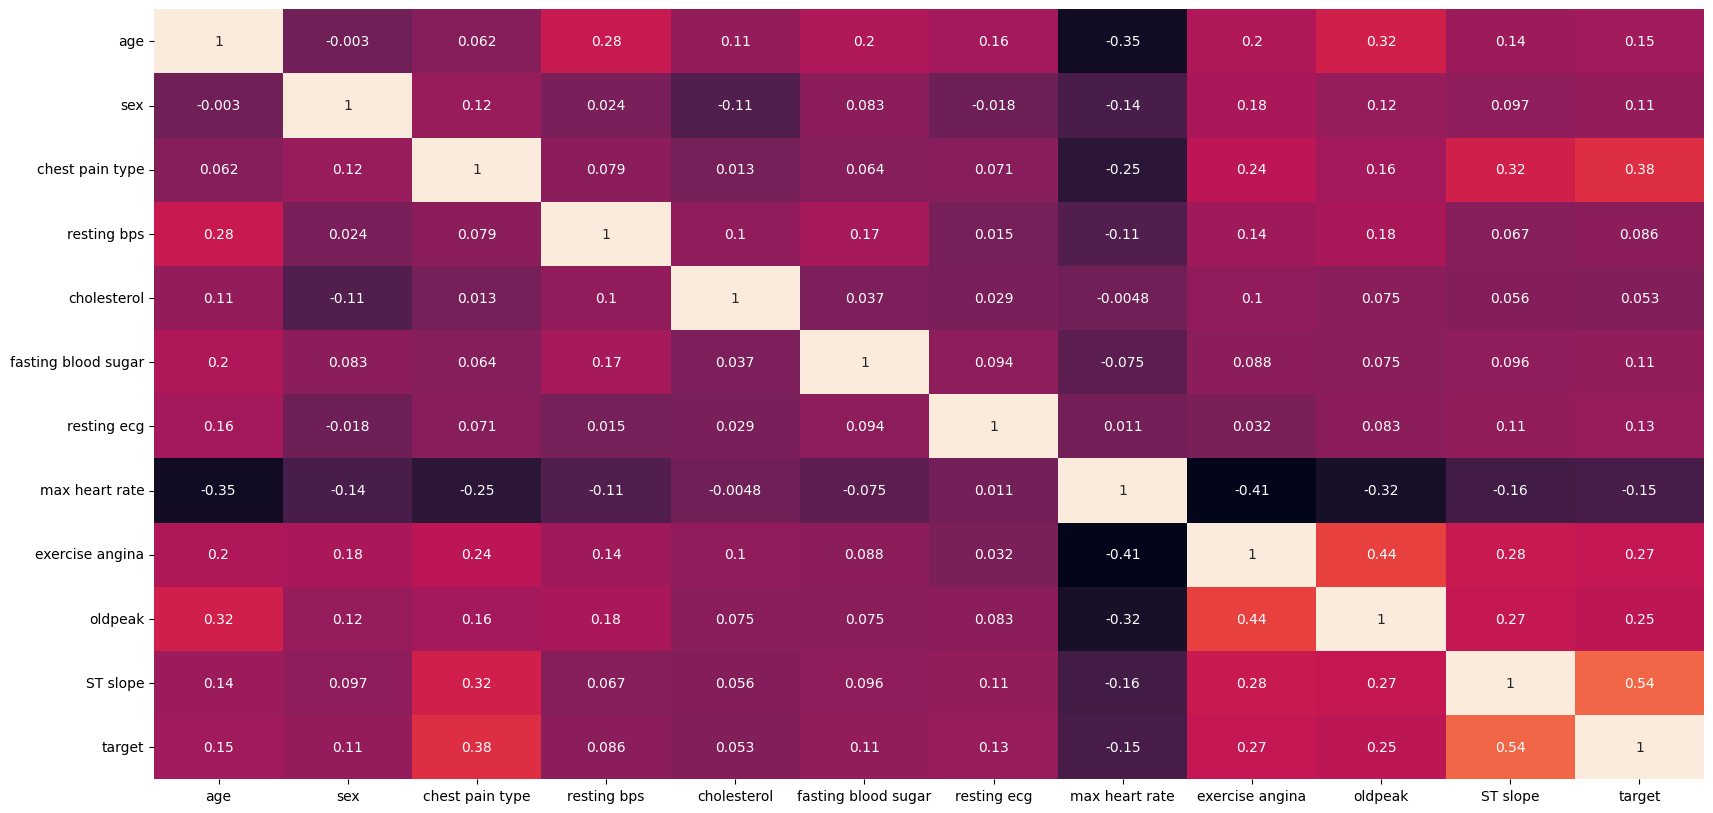

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(data = data.corr(method='spearman'),
            annot=True, cbar=False)

<Axes: xlabel='resting bps'>

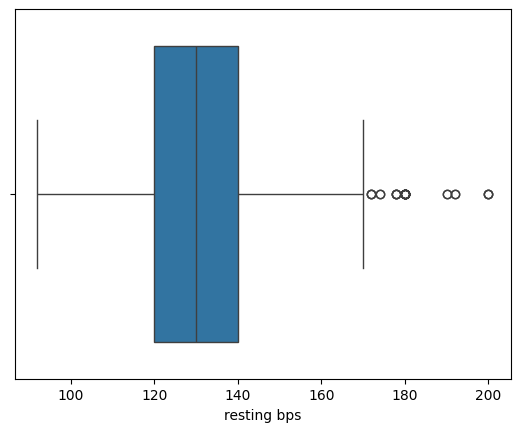

In [7]:
sns.boxplot(data=data, x = 'resting bps')

### model building 


In [8]:
X = data.drop(columns = ['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=23)


In [9]:
# scale the training set
def scaler_func(data):
    scaler = StandardScaler()
    columns = list(data.columns)
    data = scaler.fit_transform(data)
    data = pd.DataFrame(data = data, columns =columns)
    
    return data

X_train = scaler_func(data=X_train)

In [10]:
# train the model

# init the model
model = LogisticRegression()
model.fit(X_train, y_train)
train_preds = model.predict(X_train)

In [11]:
# get test prediction

X_test = scaler_func(data = X_test)
test_preds = model.predict(X_test)

### Model Evaluation

In [12]:
test_accuracy = accuracy_score(y_true=y_test, y_pred=test_preds)
print(f'test accuracy: {test_accuracy}')

test accuracy: 0.8


Text(50.72222222222221, 0.5, 'Predicted')

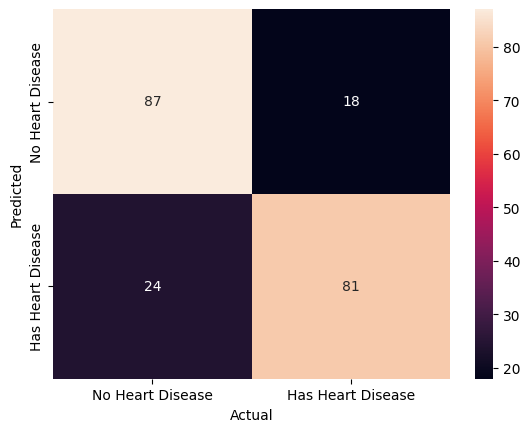

In [13]:
categories = ['No Heart Disease', 'Has Heart Disease']
test_conf = confusion_matrix(y_true=y_test, y_pred=test_preds)
test_conf = pd.DataFrame(data=test_conf,columns=categories, index=categories)
sns.heatmap(data = test_conf, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [22]:
print(f'precision of no heart disease: {precision_score(y_test, test_preds,pos_label=0)}')

precision of no heart disease: 0.7837837837837838


In [23]:
print(f'precision of has heart disease: {precision_score(y_test, test_preds,pos_label=1)}')

precision of has heart disease: 0.8181818181818182


In [17]:
87/(87 + 24)

0.7837837837837838

In [18]:
81/(81 + 18)

0.8181818181818182

In [24]:
print(f'recall of no heart disease: {recall_score(y_test, test_preds,pos_label=0)}')

recall of no heart disease: 0.8285714285714286


In [25]:
87/(87 + 18)

0.8285714285714286

In [26]:
print(f'recall of has heart disease: {recall_score(y_test, test_preds,pos_label=1)}')

recall of has heart disease: 0.7714285714285715


In [28]:
print(f'F1 score of has heart disease: {f1_score(y_test, test_preds)}')

F1 score of has heart disease: 0.7941176470588235


In [30]:
print(f'F1 score of no heart disease: {f1_score(y_test, test_preds, pos_label=0)}')

F1 score of no heart disease: 0.8055555555555556


In [33]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       105
           1       0.82      0.77      0.79       105

    accuracy                           0.80       210
   macro avg       0.80      0.80      0.80       210
weighted avg       0.80      0.80      0.80       210



In [34]:
len(test_preds)

210